<a href="https://colab.research.google.com/github/Deepthishanmugam/Sales_Forecasting_Complete/blob/main/Sales_Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Importing necessary libraries & Installing Packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot
from scipy import stats
from scipy.stats import levene

###**Downloading necessary.csv file**
 - Since there are two files we are downloading them separately

In [2]:
!gdown "https://drive.google.com/drive/folders/1fBQ1PlWMho3kHF9qXrD0McZNfpJIcbrn"

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/folders/1fBQ1PlWMho3kHF9qXrD0McZNfpJIcbrn
To: /content/1fBQ1PlWMho3kHF9qXrD0McZNfpJIcbrn
1.23MB [00:00, 17.5MB/s]


In [3]:
with open('/content/1fBQ1PlWMho3kHF9qXrD0McZNfpJIcbrn', 'r') as file:
    content = file.read()


In [4]:
import gdown

# Define the file IDs for the datasets you want to download
file_ids = [
    "1ditFn_74EOsGnblf2nXr-Vx-I1mrCG42",  # Replace with the actual file ID for dataset 1
    "1CclWDHsFLfCAuBbAv83_D5_XmeoRwWzl"   # Replace with the actual file ID for dataset 2
]

# Download each file
for file_id in file_ids:
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1ditFn_74EOsGnblf2nXr-Vx-I1mrCG42
To: /content/TRAIN.csv
100%|██████████| 9.33M/9.33M [00:00<00:00, 37.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CclWDHsFLfCAuBbAv83_D5_XmeoRwWzl
To: /content/TEST_FINAL.csv
100%|██████████| 849k/849k [00:00<00:00, 22.2MB/s]


In [5]:
df1 = pd.read_csv('TRAIN.csv')
df1.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [6]:
df2 = pd.read_csv('TEST_FINAL.csv')
df2.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [7]:
# Assigning df1 to df
df = df1

#**Suggestions for Hypothesis Testing**

Hypothesis testing is a statistical method mainly used to make inferences by following below steps,
 - Hypothesis stating
 - Choosing Significance Level (α)
 - Selecting appropriate testing
 - Test Statistic computation
 - P-value identification
 - Decision making
 - Result Interpretation

>###  ***Impact of Discounts on Sales***

As Discounts are often used to attract customers, & encourage more purchases and sometimes used to clear inventory. In addition to above discounts are provided to encourage below factors such as,
 - Increased Demand Due to Lower Prices
 - Customer Perception and Behavior
 - Attracting New Customers and Retaining Existing Ones
 - Competitive Advantages
 - Impact on Profitability

**Why t-test?**

As it allows to determine if there is a statistically significant difference in the sales before and after a discount is applied,

**Assumptions of the T-test:**

 - ###### ***Sample Groups :***
      1. Sales before discount
      2. Sales after discount

 - ###### ***Normality:***
Data is normally distributed

- ###### ***Equal variance:***
Group variances are similar

- ###### ***Form Hypotheses:***

        Null Hypothesis (H₀):  The discount does not impact sales

        Alternative Hypothesis (H₁): The discount impacts sales


In [8]:
# Descriptive Statistics of Sales based on Discount
sales_discount_group = df.groupby('Discount')['Sales'].describe()
print("Descriptive Statistics of Sales Based on Discount:")
print(sales_discount_group)

Descriptive Statistics of Sales Based on Discount:
             count          mean           std      min       25%      50%  \
Discount                                                                     
No        104051.0  37403.679678  16039.555183     0.00  27069.00  34791.0   
Yes        84289.0  49426.497620  19071.656642  1969.14  36625.35  46242.0   

              75%        max  
Discount                      
No        44968.5  197840.61  
Yes       58869.0  247215.00  


<ipython-input-9-5c473e09b1da>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




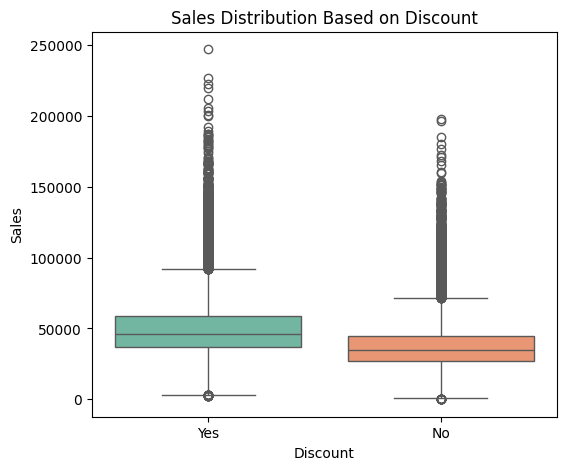

In [9]:
# Sales Distribution based on Discount
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Discount', y='Sales', palette='Set2')
plt.title('Sales Distribution Based on Discount')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

In [10]:
# T-Test
# Null hypothesis (H0): Discount doesnot impact sales
# Alternative hypothesis (H1):  Discount impact sales
discount_yes = df[df['Discount'] == 'Yes']['Sales']
discount_no = df[df['Discount'] == 'No']['Sales']
t_stat, p_value = stats.ttest_ind(discount_yes, discount_no)
print("\nT-Test Results:")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Discount impact sales")
else:
    print("Fail to reject the null hypothesis: Discount doesnot impact sales")



T-Test Results:
T-statistic: 148.579
P-value: 0.000
Reject the null hypothesis: Discount impact sales


>###  ***Effect of Holidays on Sales***

Similar to Discounts we can further anlayse if Holidays impact sales
 - Time availability of customer for purchase
 - Shopping mode
 - Possibility of increased visits

**Why t-test?**

As it allows to determine if there is a statistically significant difference in the sales before and after a Holidays,

**Assumptions of the T-test:**

- ###### ***Sample Groups :***
 1. Sales during holidays
 2. Sales during non-holidays

- ###### ***Normality:***
Data is normally distributed

- ###### ***Equal variance:***
Group variances are similar

- ###### ***Form Hypotheses:***

       Null Hypothesis (H₀):  Holidays does not impact sales

       Alternative Hypothesis (H₁): Holidays impacts sales


In [11]:
# Descriptive Statistics of Sales based on Holiday
sales_holiday_group = df.groupby('Holiday')['Sales'].describe()
print("Descriptive Statistics of Sales Based on Holiday:")
print(sales_holiday_group)

Descriptive Statistics of Sales Based on Holiday:
            count          mean           std  min       25%       50%  \
Holiday                                                                  
0        163520.0  43897.288998  18143.426019  0.0  31389.00  40530.00   
1         24820.0  35451.878930  18822.332593  0.0  23778.57  33417.54   

               75%        max  
Holiday                        
0        52761.000  247215.00  
1        45247.125  197840.61  


<ipython-input-12-626627e0ef26>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




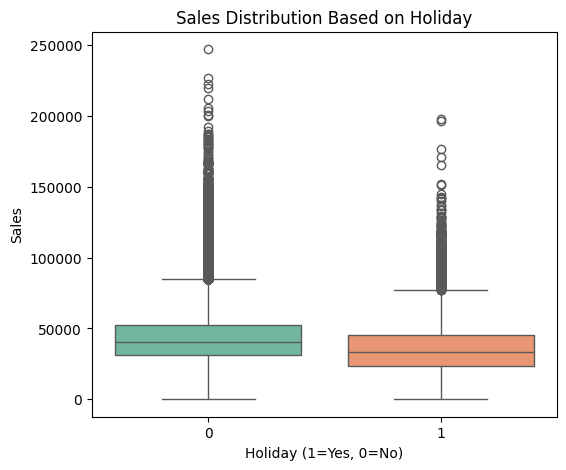

In [12]:
# Sales vs Holidays
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Holiday', y='Sales', palette='Set2')
plt.title('Sales Distribution Based on Holiday')
plt.xlabel('Holiday (1=Yes, 0=No)')
plt.ylabel('Sales')
plt.show()

In [13]:
# T-Test
# Null hypothesis (H0): Holidays does not impact sales
# Alternative hypothesis (H1): Holidays impacts sales
holiday_yes = df[df['Holiday'] == 1]['Sales']
holiday_no = df[df['Holiday'] == 0]['Sales']
t_stat, p_value = stats.ttest_ind(holiday_yes, holiday_no)
print("\nT-Test Results:")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis:Holidays impacts sales")
else:
    print("Fail to reject the null hypothesis: Holidays does not impact sales")



T-Test Results:
T-statistic: -67.990
P-value: 0.000
Reject the null hypothesis:Holidays impacts sales


>###  ***Sales Differences Across Store Types***

We can analyse if the sales happening across different store_types are different in order to do following
 - Replicate the same business statergies to increase sales
 - Collecting feedback from locality customers, what they are seeking for
 - Getting to know the demand
 - Implementing new advertisement stategies for improving sales

**Why ANOVA?**

Since we have more than two groups anova helps us to do comparison easily as it is a well-established, efficient, and widely-used method in statistics.

####**Assumptions of the ANOVA:**

- ###### ***Independence :***
 Sales from each store type should be independent of each other

- ###### ***Normality:***
The sales data for each store type should follow a normal distribution.

- ###### ***Equal variance:***
Group variances are similar

- ###### ***Homogeneity of Variances:***
The variance in sales should be roughly equal across the store types
Since Levene's test is flexible & robust to Non-Normality, it is used in analysing homoscedasticity.

       Null Hypothesis (H₀):  There is no significant difference in sales across store types.

       Alternative Hypothesis (H₁): There is a statistically significant difference in sales across store types.


In [14]:
# Descriptive Statistics of Sales based on Store Type
sales_store_type_group = df.groupby('Store_Type')['Sales'].describe()
print("Descriptive Statistics of Sales Based on Store Type:")
print(sales_store_type_group)


Descriptive Statistics of Sales Based on Store Type:
              count          mean           std      min      25%      50%  \
Store_Type                                                                   
S1          88752.0  37676.511694  12303.151090     0.00  29859.0  36444.0   
S2          28896.0  27530.828222   9168.839395  1748.28  21666.0  26794.5   
S3          24768.0  47063.068209  14907.465521     0.00  37656.0  45445.5   
S4          45924.0  59945.685926  20750.228035     0.00  46503.0  57075.0   

                 75%       max  
Store_Type                      
S1          44439.00  143841.0  
S2          32703.90   96363.0  
S3          55062.75  166323.0  
S4          70326.75  247215.0  


<ipython-input-15-e4e7064e4011>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




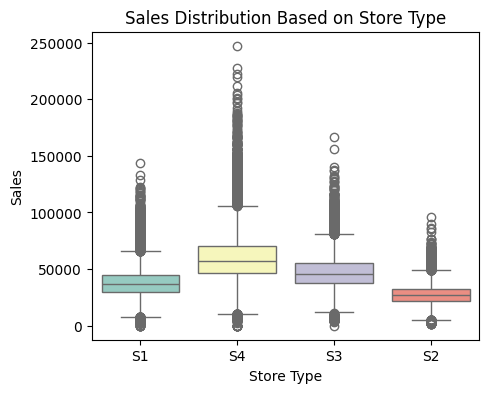

In [15]:
# Sales Distribution Based on Store Type
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='Store_Type', y='Sales', palette='Set3')
plt.title('Sales Distribution Based on Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

In [16]:
# Levene's test
s1 = df[df['Store_Type'] == 'S1']['Sales']
s2 = df[df['Store_Type'] == 'S2']['Sales']
s3 = df[df['Store_Type'] == 'S3']['Sales']
s4 = df[df['Store_Type'] == 'S4']['Sales']
stat, p_value = levene(s1, s2, s3, s4)
print(f"Levene's Statistic: {stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Variances are heterogeneous")
else:
    print("Variances are homogeneous")

Levene's Statistic: 5206.219646908859
p-value: 0.0
Variances are heterogeneous


In [17]:
# ANOVA
# Null hypothesis (H0): There is no significant difference in sales between different store types.
# Alternative hypothesis (H1): There is a significant difference in sales between store types.
store_types = df['Store_Type'].unique()
sales_by_store_type = [df[df['Store_Type'] == store_type]['Sales'] for store_type in store_types]
f_stat, p_value = stats.f_oneway(*sales_by_store_type)
print("\nANOVA Results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.3f}")
if p_value < 0.05:
    print("\nThere is a statistically significant difference in Sales across Store Types.")
else:
    print("\nThere is no statistically significant difference in Sales across Store Types.")


ANOVA Results:
F-statistic: 35123.644
P-value: 0.000

There is a statistically significant difference in Sales across Store Types.


>####  ***Regional Sales Variability***

We can analyse if the sales happening across different store_types are different in order to do following
 - Getting to know the factors affecting sales
 - Understanding the distribution of population across region
 - Factors affecting sales
 - Interest of people
 - Identifying Advertisement stategies
 - Identifying demand

**Why ANOVA?**

Since we have more than two groups anova helps us to do comparison easily as it is a well-established, efficient, and widely-used method in statistics.

**Assumptions of the ANOVA:**

- ###### ***Independence :***
 Sales from each Region should be independent of each other

- ###### ***Normality:***
The sales data for each Region should follow a normal distribution.

- ###### ***Equal variance:***
Group variances are similar

- ###### ***Homogeneity of Variances:***
The variance in sales should be roughly equal across the Regions.
Since Levene's test is flexible & robust to Non-Normality, it is used in analysing homoscedasticity.

       Null Hypothesis (H₀):  There is no significant difference in sales across Regions.

       Alternative Hypothesis (H₁): There is a statistically significant difference in sales across Regions.



In [18]:
# Descriptive Statistics of Sales based on Region_Code
sales_region_group = df.groupby('Region_Code')['Sales'].describe()
print("Descriptive Statistics of Sales Based on Region_Code:")
print(sales_region_group)

Descriptive Statistics of Sales Based on Region_Code:
               count          mean           std     min       25%      50%  \
Region_Code                                                                   
R1           63984.0  46765.488405  21286.095441     0.0  32091.00  43125.0   
R2           54180.0  40054.847344  16468.619529     0.0  29078.25  37548.0   
R3           44376.0  42144.517063  16615.730308     0.0  30876.00  39661.5   
R4           25800.0  39743.434249  15930.494396  2009.7  29195.64  37474.5   

                  75%       max  
Region_Code                      
R1           57624.00  247215.0  
R2           48357.00  192156.0  
R3           50970.75  227127.0  
R4           47796.00  161271.0  


<ipython-input-19-833ffbfb8f8d>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




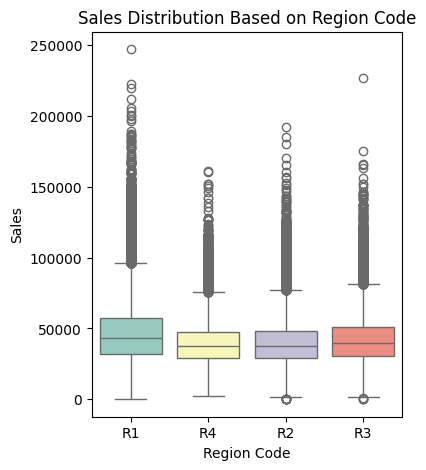

In [19]:
# Sales Distribution based on Region_Code
plt.figure(figsize=(4, 5))
sns.boxplot(data=df, x='Region_Code', y='Sales', palette='Set3')
plt.title('Sales Distribution Based on Region Code')
plt.xlabel('Region Code')
plt.ylabel('Sales')
plt.show()

In [20]:
# Levene's test
R1 = df[df['Region_Code'] == 'R1']['Sales']
R2 = df[df['Region_Code'] == 'R2']['Sales']
R3 = df[df['Region_Code'] == 'R3']['Sales']
R4 = df[df['Region_Code'] == 'R4']['Sales']
stat, p_value = levene(R1, R2, R3, R4)
print(f"Levene's Statistic: {stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Variances are heterogeneous")
else:
    print("Variances are homogeneous")

Levene's Statistic: 1235.2684068578194
p-value: 0.0
Variances are heterogeneous


In [21]:
# ANOVA
# Null hypothesis (H0): There is no significant difference in sales between different regions.
# Alternative hypothesis (H1): There is a significant difference in sales between regions.
regions = df['Region_Code'].unique()
sales_by_region = [df[df['Region_Code'] == region]['Sales'] for region in regions]
f_stat, p_value = stats.f_oneway(*sales_by_region)
print("\nANOVA Results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("\nThere is a statistically significant difference in Sales across Region Codes.")
else:
    print("\nThere is no statistically significant difference in Sales across Region Codes.")



ANOVA Results:
F-statistic: 1682.426
P-value: 0.000

There is a statistically significant difference in Sales across Region Codes.


>###  ***Correlation between Number of Orders and Sales***

As it helps in identifying the relationship between two factors, Sales & Order in our case.
It helps in below factor,
 - Getting to know the relationship
 - Helps improvising marketing
 - Helps implementing promotional efforts
 - Helps us focusing on increasing the order volume
 - Helps to forecast sales based on expected orders

From below we can see the positive correlation between sales & orders, which means if Order increases sales also increases.

In [22]:
# Pearson correlation coefficient
correlation = df['#Order'].corr(df['Sales'])
print(f"Pearson Correlation between #Order and Sales: {correlation:.3f}")

# Interpretation
if correlation > 0:
    print("There is a positive correlation between the number of orders and sales.")
elif correlation < 0:
    print("There is a negative correlation between the number of orders and sales.")
else:
    print("There is no correlation between the number of orders and sales.")


Pearson Correlation between #Order and Sales: 0.942
There is a positive correlation between the number of orders and sales.


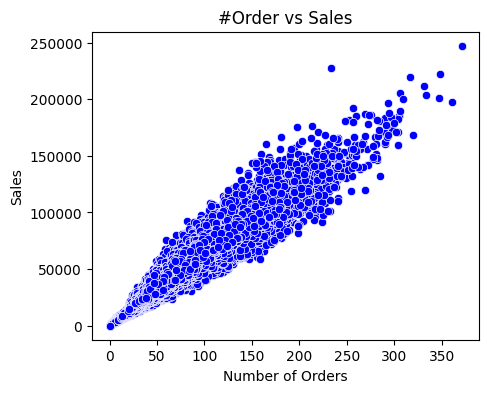

In [23]:
# #Order vs Sales
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='#Order', y='Sales', color='blue')
plt.title('#Order vs Sales')
plt.xlabel('Number of Orders')
plt.ylabel('Sales')
plt.show()